## **Missing Values- Feature Engineering- Day 1**


Data Collection Statergy---from company side,3rd party APi's,Surveys,Surveys
Feature Engineering---Handling Missing Values


Why are their Missing values??

Survey--Depression Survey


1. They hesitate to put down the information
2. Survey informations are not that valid
3. Men--salary
4. Women---age
5. People may have died----NAN

Data Science Projects---Dataset should be collected from multiple sources

What are the different types of Missing Data?


**Missing Completely at Random(MCAR)**:

A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.


In [16]:
import pandas as pd


In [17]:
df = pd.read_csv('/content/titanic.csv')

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
df.isnull().sum() #checking the missing records

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

there are some missing values in Age and cabin column , and there are some relation between age and cabin column , so it's not a missing completely at random(MCAR).

In [20]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


so this embarked missing value column is MCAR

**Missing Data Not At Random(MNAR)**: Systematic missing Values

There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

Age and cabin column has some relationship . so it's a MNAR

In [21]:
import numpy as np


In [22]:
df['Cabin_null'] = np.where(df['Cabin'].isnull(),1,0)


The line of code is used in the context of a pandas DataFrame to create a new column named Cabin_null. This new column is a binary indicator that flags whether the Cabin column contains null (missing) values.

np.where(df['Cabin'].isnull(), 1, 0):

This evaluates the boolean Series returned by df['Cabin'].isnull().

If an element in the Cabin column is null, it assigns a value of 1 in the Cabin_null column.

If an element in the Cabin column is not null, it assigns a value of 0 in the Cabin_null column.

**0 for non-missing values.**

**1 for missing values.**

In [23]:
#find the percentage of null values
df['Cabin_null'].mean()

0.7710437710437711

In [24]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_null'],
      dtype='object')

In [25]:
df['Cabin_null']

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    1
889    0
890    1
Name: Cabin_null, Length: 891, dtype: int64

In [26]:
df.groupby(['Survived'])['Cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

The line of code is used in the context of a pandas DataFrame to calculate the mean of the Cabin_null column for each group defined by the values in the Survived column. This is particularly useful in the Titanic dataset, where Survived indicates whether a passenger survived (1) or not (0), and Cabin_null indicates whether the Cabin data is missing (1) or not (0).

This information can be useful for understanding the relationship between the presence of missing cabin data and survival rates. For example, if a higher proportion of missing cabin data is associated with passengers who did not survive.  this could provide insights into the conditions or quality of data collection for those passengers.

In [27]:
df.groupby(['Cabin_null'])['Survived'].mean()

Cabin_null
0    0.666667
1    0.299854
Name: Survived, dtype: float64

This line of code groups the DataFrame by the Cabin_null column and then calculates the mean of the Survived column for each group.

Grouping by Cabin_null:

Cabin_null is a binary column indicating whether the Cabin value is missing (1) or not (0).


Calculating the mean of Survived:

Survived is typically a binary column in the Titanic dataset, where 1 indicates survival and 0 indicates non-survival.
The mean of Survived in each Cabin_null group gives the survival rate for passengers with missing cabin data and those with cabin data.



**df.groupby(['Cabin_null'])['Survived'].mean():**

Grouping: By whether cabin data is missing.
Insight: Provides the survival rate for passengers with and without missing cabin data.


**df.groupby(['Survived'])['Cabin_null'].mean():**

Grouping: By survival status.
Insight: Provides the proportion of passengers with missing cabin data among those who survived and those who did not.

# **Missing At Random(MAR)**
Men---hide their salary

Women---hide their age

### All the techniques of handling Missing values

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN(Not a Number) values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

## Mean/Median/Mode Imputation

When should we apply?

 Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables

In [28]:
df = pd.read_csv('/content/titanic.csv' , usecols=['Age', 'Fare' , 'Survived'])

In [29]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [31]:
#let's see the percentage of missing values

df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [32]:
median = df.Age.median()

In [33]:
median

28.0

we are taking median becuase mean has outliers.

In [34]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

The original Age column contains some missing values (NaN).

The median of the Age column is calculated (in this case, it is 28.0).

The impute_nan function creates a new column Age_median where all NaN values in the original Age column are replaced with the median value 28.0.

This function is useful for handling missing data by replacing NaN values with a statistical measure like the median, ensuring that the new column has no missing values and is more suitable for further analysis or modeling.

In [35]:
impute_nan(df, 'Age' , median)

In [36]:
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [37]:
print(df['Age'].std())
print(df['Age_median'].std())


14.526497332334042
13.019696550973201


In [38]:
import matplotlib.pyplot as plt


In [39]:
%matplotlib inline

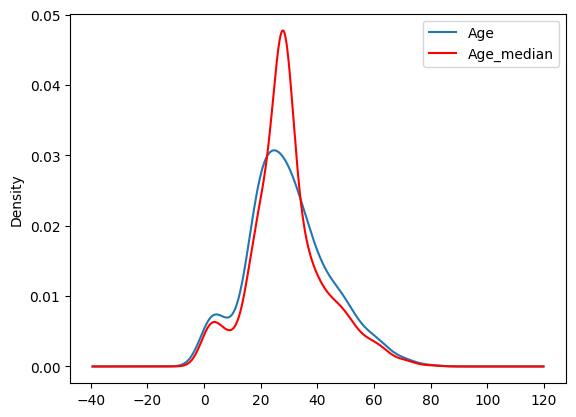

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

##Summary:


####Purpose:
 The code visualizes the distributions of the Age and Age_median columns to compare the effect of imputing missing values with the median.

####KDE Plot:
Kernel Density Estimation is used to smooth the distribution of the data points, providing a continuous estimate of the probability density function.

####Legend:

 The legend helps differentiate between the original Age column and the imputed Age_median column in the plot.



####Visualization:

The resulting plot will show two KDE curves:

1. Original Age column (default color): Shows the distribution of the original age data, including missing values.
2. Age_median column (red): Shows the distribution of the age data after imputing missing values with the median.



This visual comparison helps in understanding how the imputation has affected the distribution of the age data

**Advantages And Disadvantages of Mean/Median Imputation**

####Advantages :
1. Easy to implement(Robust to outliers)
2. Faster way to obtain the complete dataset

####Disadvantages

1. Change or Distortion in the original variance
2. Impacts Correlation